# Income Inequality Prediction

## 01_Step Importing required Libraries
* Define problem (regression, classification etc.) with objective, success criteria, and constraints.
* Import required libraries.

In [81]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
from phik.report import plot_correlation_matrix
from skimpy import skim
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# feature engineering libraries
from sklearn.preprocessing import StandardScaler , LabelEncoder, OrdinalEncoder , OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper

# model preparation libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.svm import SVC , NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier , XGBRFClassifier

# model evaluation libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedKFold

# model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## 02_Data Collection and Preparation
* Gather relevant data from various sources.
* 
Clean and preprocess the data (handle missing values, outliers, etc.
* 
Split the data into training and testing sets.

#### Gethering, loading and undersating Data

In [2]:
# Reset display options (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [3]:
dataset = pd.read_csv("Data.csv")
dataset.head(1)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit


In [4]:
# Removing white spaces and seting ID as index
dateset = dataset.map(lambda x: x.strip() if isinstance(x, str) else x)
dataset.set_index('ID', inplace=True)

In [5]:
dataset.replace({"?": None}, inplace=True)

In [6]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 209499 │ │ string      │ 29    │                                                          │
│ │ Number of columns │ 42     │ │ int32       │ 12    │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean  ┃ sd    ┃ p0  ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ age                       │   0 │      0 │    35 │    22 │   0 │    15 │    33 │    50 │      90 │ ▇▇▇▅▃▂  │  │
│ │ employment_stat           │   0 │      0 │  0.18 │  0.56 │   0 │     0 │     0 │     0 │       2 │ ▇    ▁  │  │
│ │ wage_per_hour             │   0 │      0 │    55 │   280 │   0 │     0 │     0 │     0 │   10000 │    ▇    │  │
│ │ working_week_per_year     │   0 │      0 │    23 │    24 │   0 │     0 │     8 │    52 │      52 │ ▇   ▁▆  │  │
│ │ industry_code             │   0 │      0 │    15 │    18 │   0 │     0 │     0 │    33 │      51 │ ▇  ▂▂▁  │  │
│ │ occupation_code           │   0 │      0 │    11 │    14 │   0 │     0 │     0 │    26 │      46 │ ▇▁▁▂▂▁  │  │
│ │ total_employed            │   0 │      0 │     2 │   2.4 │   0 │     0 │     1 │     4 │       6 │ ▇▂▁▁▁▃  │  │
│ │ vet_benefit               │   0 │      0 │   1.5 │  0.85 │   0 │     2 │     2 │     2 │       2 │ ▃    ▇  │  │
│ │ gains                     │   0 │      0 │   440 │  4700 │   0 │     0 │     0 │     0 │  100000 │    ▇    │  │
│ │ losses                    │   0 │      0 │    37 │   270 │   0 │     0 │     0 │     0 │    4600 │    ▇    │  │
│ │ stocks_status             │   0 │      0 │   190 │  2000 │   0 │     0 │     0 │     0 │  100000 │    ▇    │  │
│ │ mig_year                  │   0 │      0 │    94 │   0.5 │  94 │    94 │    94 │    95 │      95 │ ▇    ▇  │  │
│ │ importance_of_record      │   0 │      0 │  1700 │  1000 │  38 │  1100 │  1600 │  2200 │   19000 │   ▇▁    │  │
│ └───────────────────────────┴─────┴────────┴───────┴───────┴─────┴───────┴───────┴───────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA          ┃ NA %      ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                             │           0 │         0 │                      2 │             418998 │  │
│ │ education                          │           0 │         0 │                    4.1 │             854086 │  │
│ │ class                              │      105245 │     50.24 │                    1.1 │             233701 │  │
│ │ education_institute                │      196197 │  

#### Handling Features with missing Values

In [7]:
round((dataset.isnull().sum().sum()) / (dataset.shape[0] * dataset.shape[1]) *100,2).astype(str) + " %"

'19.83 %'

##### 💡 Observation 
* If there are more tahn 50% null values in dataset it doesn,t qaulify for good anlysis and model. 

In [8]:
# Check for missing values
missing_value_percent = round(dataset.isnull().sum() / dataset.shape[0] * 100,2)
(missing_value_percent[missing_value_percent > 0 ]).astype(str) + " %"

class                             50.24 %
education_institute               93.65 %
unemployment_reason               96.89 %
is_labor_union                    90.42 %
occupation_code_main              50.45 %
under_18_family                   72.39 %
veterans_admin_questionnaire      99.01 %
migration_code_change_in_msa       0.76 %
migration_prev_sunbelt            42.22 %
migration_code_move_within_reg     0.76 %
migration_code_change_in_reg       0.76 %
residence_1_year_ago              50.73 %
old_residence_reg                  92.2 %
old_residence_state                92.2 %
dtype: object

##### 💡 Observation 
* If there are more tahn 30% null values in a feature it doesn,t qaulify for good anlysis and model unless it is required by domain after carefull analysis. 

In [9]:
missing_value_column = missing_value_percent[missing_value_percent > 40].index
missing_value_column

Index(['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'migration_prev_sunbelt',
       'residence_1_year_ago', 'old_residence_reg', 'old_residence_state'],
      dtype='object')

In [10]:
# Drop features with missing values > 40%
dataset.drop(columns=missing_value_column ,inplace=True)

In [11]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'object']
num_features=[col for col in dataset.columns if pd.api.types.is_numeric_dtype(dataset[col])]
discrete_features =[feature for feature in num_features if len(dataset[feature].unique()) < 20]
continous_features = [feature for feature in num_features if feature not in discrete_features]
print(f"Categorical features count: {len(categorical_features)}")
print(f"Numerical features count: {len(num_features)}")
print(f"Discrete features count: {len(discrete_features)}")
print(f"Contineous features count: {len(continous_features)}")

Categorical features count: 18
Numerical features count: 13
Discrete features count: 4
Contineous features count: 9


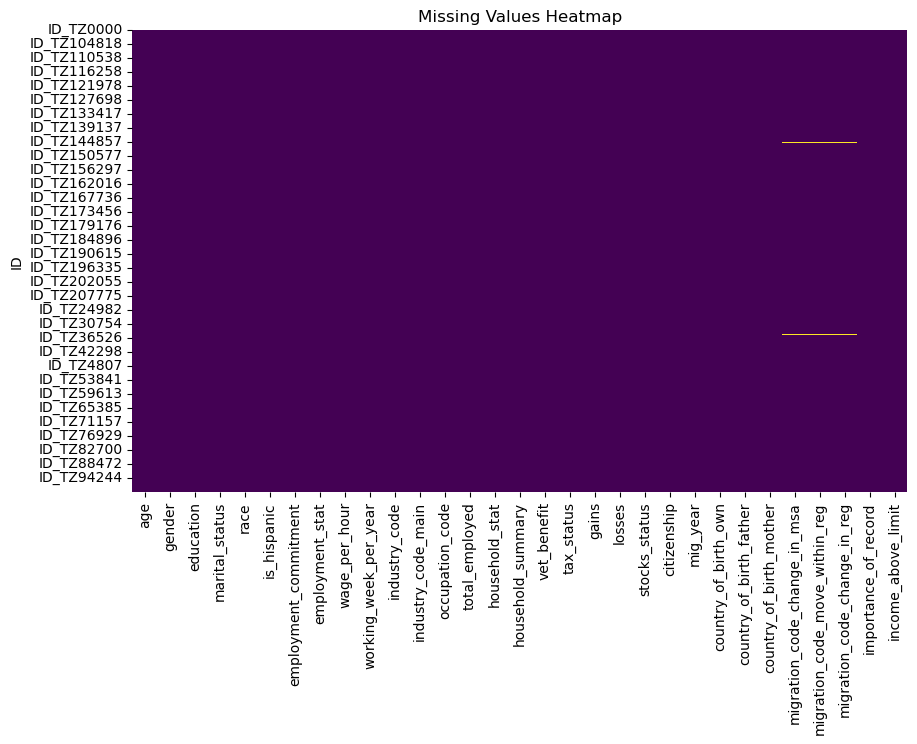

In [12]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [13]:
missing_rows = dataset.isnull().sum()
missing_rows[missing_rows>0]

migration_code_change_in_msa      1588
migration_code_move_within_reg    1588
migration_code_change_in_reg      1588
dtype: int64

In [14]:
# Drop columns with unimportant info
dataset.drop(columns=["migration_code_change_in_msa","migration_code_move_within_reg", "migration_code_change_in_reg"],inplace=True)

In [15]:
# Drop Duplicate rows
print(dataset.shape)
df = dataset.drop_duplicates()
print(df.shape)

(209499, 28)
(204403, 28)


In [16]:
def plot_numerical_distribution(feature, hue ="income_above_limit", data=df):
  """
  Creates a visualization and calculates descriptive statistics for a numerical feature,
  colored by a categorical variable (hue).

  Args:
      feature (str): Name of the numerical feature to plot.
      hue (str): Name of the categorical variable for coloring.
      data (pd.DataFrame): DataFrame containing the data.
  """  
  # Descriptive statistics
  descriptive_stats = data.groupby(hue)[feature].describe(percentiles=[0.25, 0.5, 0.75])
  print(f"Descriptive Statistics for {feature} by {hue}:\n{descriptive_stats}")

  # Create histogram with hue
  sns.histplot(data=data, x=feature, hue=hue, kde=True)
  plt.xlabel(feature)
  plt.ylabel("Density")
  plt.title(f"Distribution of {feature} by {hue}")
  plt.show()

In [17]:
print(num_features)

['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record']


Descriptive Statistics for age by income_above_limit:
                       count       mean        std   min   25%   50%   75%  \
income_above_limit                                                           
Above limit          12998.0  46.323204  11.759821  16.0  38.0  45.0  53.0   
Below limit         191405.0  34.426593  22.486253   0.0  16.0  32.0  50.0   

                     max  
income_above_limit        
Above limit         90.0  
Below limit         90.0  


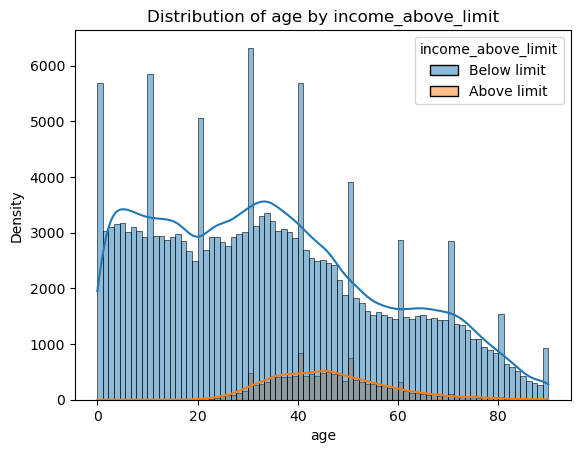

In [18]:
plot_numerical_distribution(feature="age")

Descriptive Statistics for importance_of_record by income_above_limit:
                       count         mean          std    min      25%  \
income_above_limit                                                       
Above limit          12998.0  1792.474365   961.625813  49.82  1118.52   
Below limit         191405.0  1741.492273  1002.041715  37.87  1056.96   

                        50%       75%       max  
income_above_limit                               
Above limit         1676.94  2240.265   8432.83  
Below limit         1615.57  2190.300  18656.30  


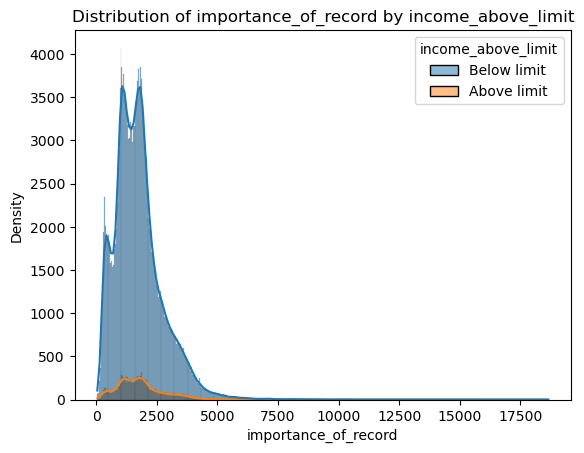

In [19]:
plot_numerical_distribution(feature="importance_of_record")

Descriptive Statistics for total_employed by income_above_limit:
                       count      mean       std  min  25%  50%  75%  max
income_above_limit                                                       
Above limit          12998.0  4.024388  2.118467  0.0  2.0  5.0  6.0  6.0
Below limit         191405.0  1.867328  2.327550  0.0  0.0  1.0  4.0  6.0


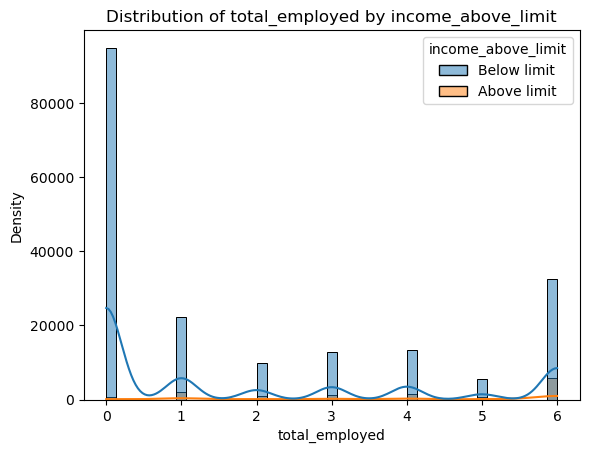

In [20]:
plot_numerical_distribution(feature="total_employed")

Descriptive Statistics for wage_per_hour by income_above_limit:
                       count       mean         std  min  25%  50%  75%  \
income_above_limit                                                        
Above limit          12998.0  80.677643  435.187208  0.0  0.0  0.0  0.0   
Below limit         191405.0  55.188203  266.168702  0.0  0.0  0.0  0.0   

                       max  
income_above_limit          
Above limit         9999.0  
Below limit         9916.0  


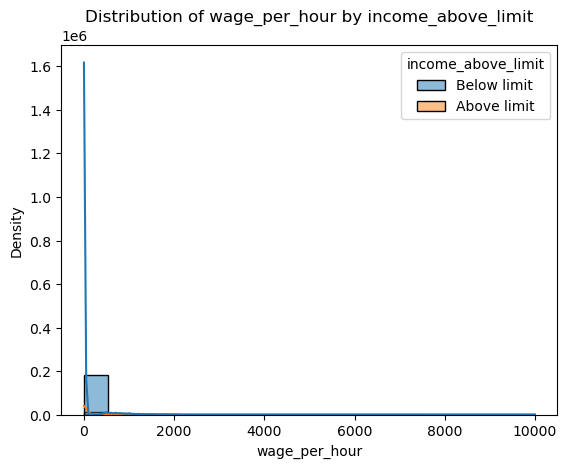

In [21]:
plot_numerical_distribution(feature="wage_per_hour")

Descriptive Statistics for mig_year by income_above_limit:
                       count       mean       std   min   25%   50%   75%  \
income_above_limit                                                          
Above limit          12998.0  94.533313  0.498908  94.0  94.0  95.0  95.0   
Below limit         191405.0  94.498231  0.499998  94.0  94.0  94.0  95.0   

                     max  
income_above_limit        
Above limit         95.0  
Below limit         95.0  


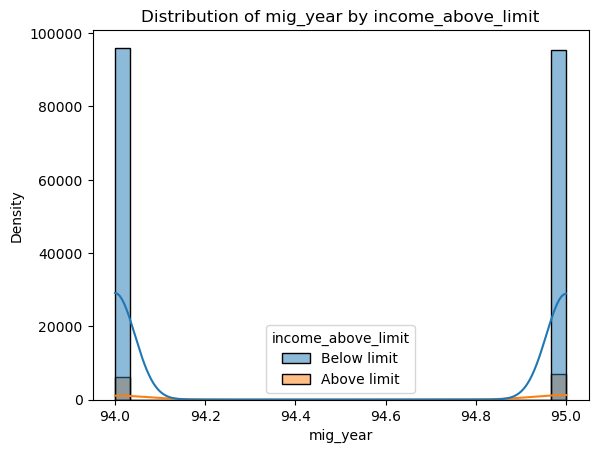

In [22]:
plot_numerical_distribution(feature="mig_year")

Descriptive Statistics for vet_benefit by income_above_limit:
                       count      mean       std  min  25%  50%  75%  max
income_above_limit                                                       
Above limit          12998.0  1.980920  0.136811  1.0  2.0  2.0  2.0  2.0
Below limit         191405.0  1.522468  0.847017  0.0  2.0  2.0  2.0  2.0


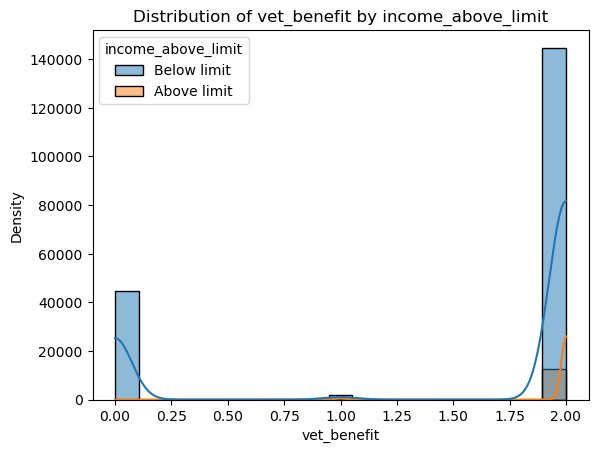

In [23]:
plot_numerical_distribution(feature="vet_benefit")

Descriptive Statistics for gains by income_above_limit:
                       count         mean           std  min  25%  50%  75%  \
income_above_limit                                                            
Above limit          12998.0  4822.982459  16908.768356  0.0  0.0  0.0  0.0   
Below limit         191405.0   149.615324   1825.575104  0.0  0.0  0.0  0.0   

                        max  
income_above_limit           
Above limit         99999.0  
Below limit         99999.0  


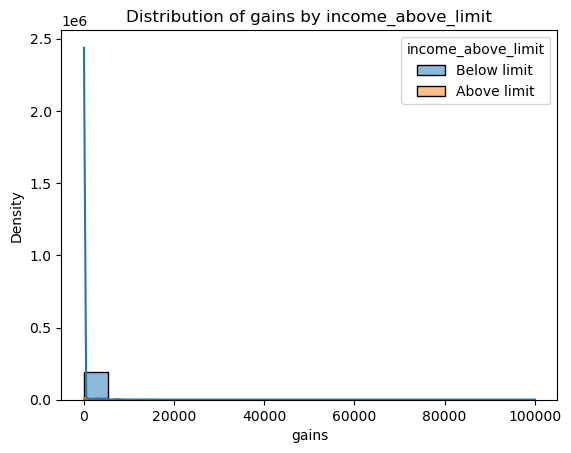

In [24]:
plot_numerical_distribution(feature="gains")

Descriptive Statistics for losses by income_above_limit:
                       count        mean         std  min  25%  50%  75%  \
income_above_limit                                                         
Above limit          12998.0  196.841668  610.436281  0.0  0.0  0.0  0.0   
Below limit         191405.0   27.001066  229.877548  0.0  0.0  0.0  0.0   

                       max  
income_above_limit          
Above limit         3683.0  
Below limit         4608.0  


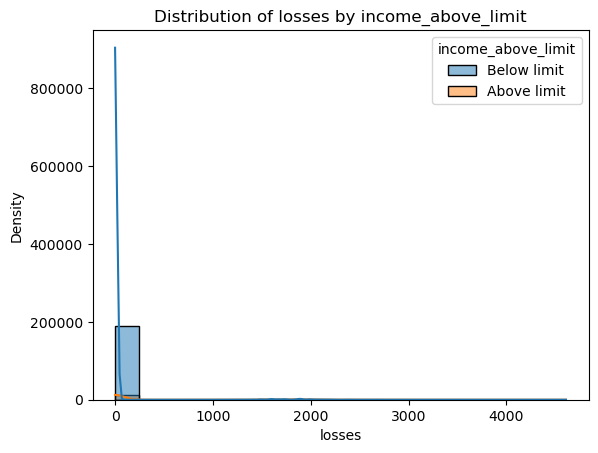

In [25]:
plot_numerical_distribution(feature="losses")

In [26]:
def plot_category_counts(feature, hue = "income_above_limit", data=df, ticks_rotation = 0 , figsize=(5,3)):
  """
  Creates a count plot using seaborn to visualize the distribution of categories in a feature,
  colored by a target variable (hue).

  Args:
      feature (str): Name of the feature to plot.
      hue (str): Name of the target variable for coloring.
      data (pd.DataFrame): DataFrame containing the data.
  """
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(x=feature, hue=hue, data=data)
  plt.xlabel(feature)
  plt.xticks(rotation = ticks_rotation)  
  plt.ylabel("Count")
  plt.title(f"Distribution of Categories in {feature} by {hue}")
  plt.show()
def plot_category_distribution(feature, hue = "income_above_limit", data=df, ticks_rotation = 0):
  """
  Creates a custom bar plot using matplotlib to visualize the distribution of categories
  in a feature, colored by a target variable (hue), with categories on the y-axis.

  Args:
      feature (str): Name of the feature to plot.
      hue (str): Name of the target variable for coloring.
      data (pd.DataFrame): DataFrame containing the data.
  """
  categories = data[feature].unique()
  counts = data.groupby([feature, hue])[feature].count().unstack(fill_value=0)

  fig, ax = plt.subplots(figsize=(12, 6))
  bars = ax.barh(categories, counts.iloc[:, 0], color=sns.color_palette())  # Use first column for heights
  ax.set_xlabel("Count")
  ax.set_ylabel(feature)
  ax.set_title(f"Distribution of Categories in {feature} by {hue}")
  ax.bar_label(bars)  # Add count labels to bars
  plt.tight_layout()
  plt.show()

In [27]:
print(categorical_features)

['gender', 'education', 'marital_status', 'race', 'is_hispanic', 'employment_commitment', 'industry_code_main', 'household_stat', 'household_summary', 'tax_status', 'citizenship', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'income_above_limit']


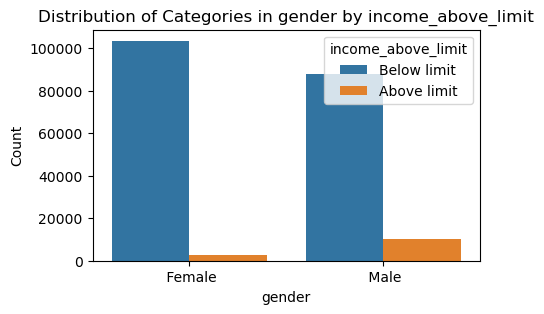

In [28]:
plot_category_counts(feature="gender")

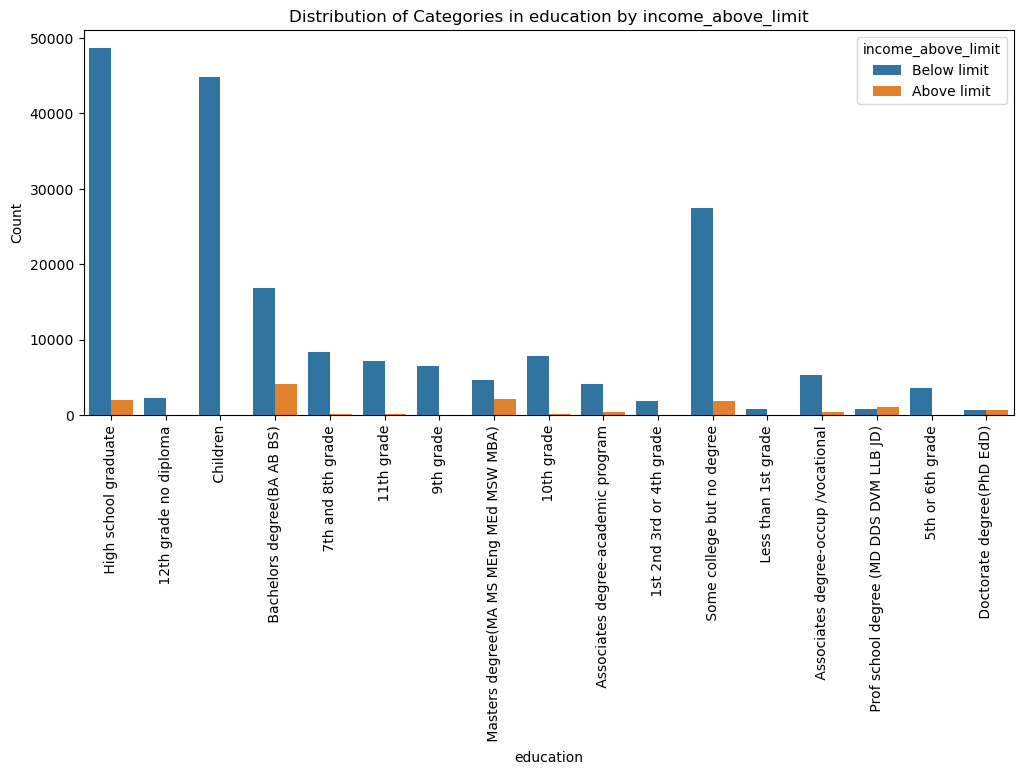

In [29]:
plot_category_counts(feature="education", ticks_rotation=90 , figsize=(12,5))

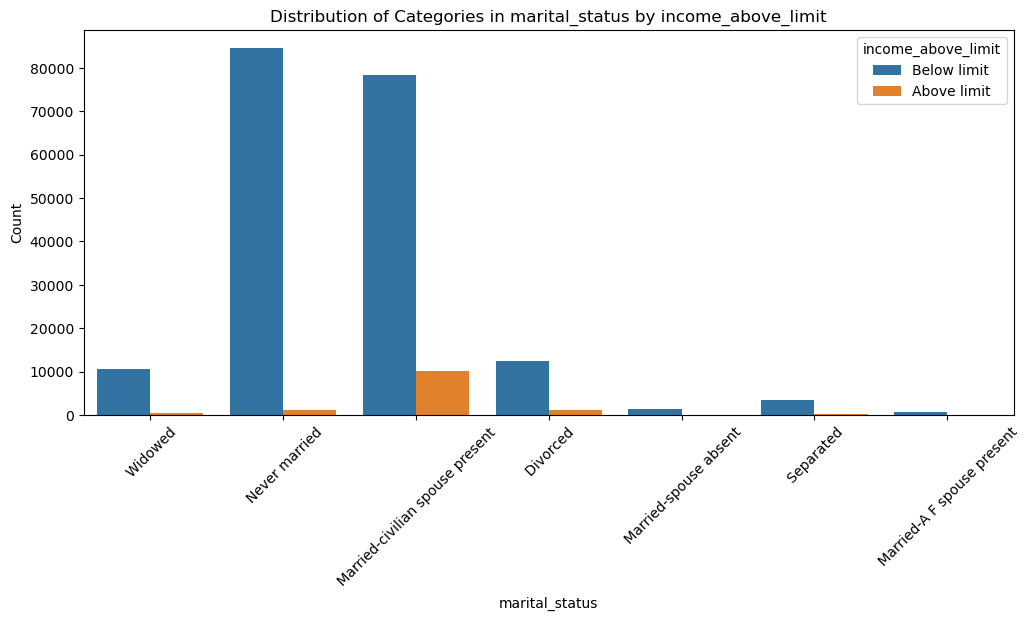

In [30]:
plot_category_counts(feature="marital_status", ticks_rotation=45 , figsize=(12,5))

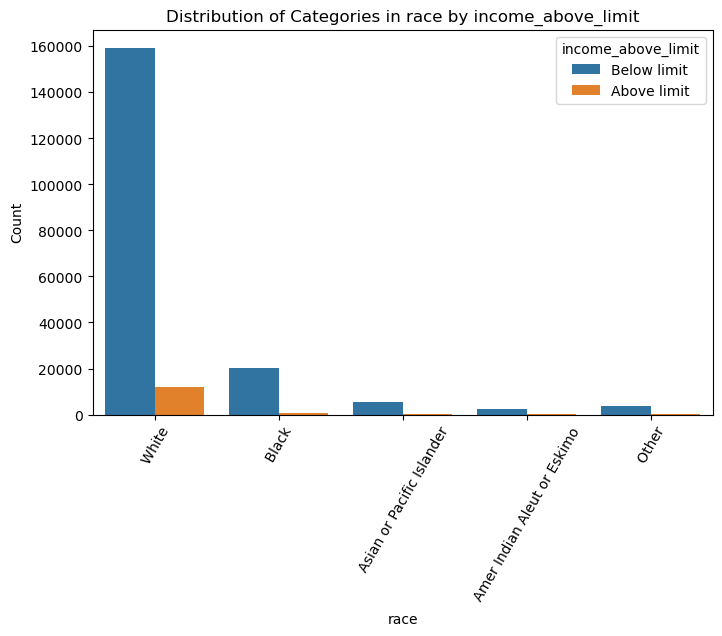

In [31]:
plot_category_counts(feature="race", ticks_rotation=60 , figsize=(8,5))

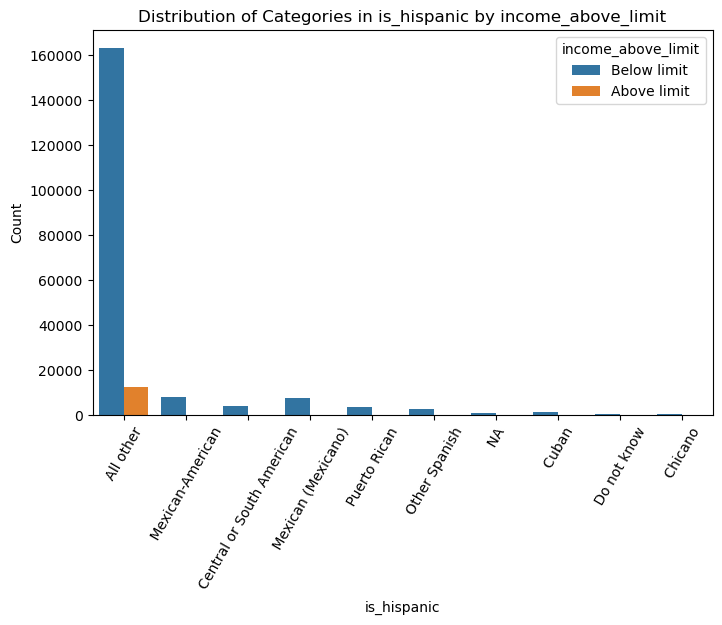

In [32]:
plot_category_counts(feature="is_hispanic", ticks_rotation=60 , figsize=(8,5))

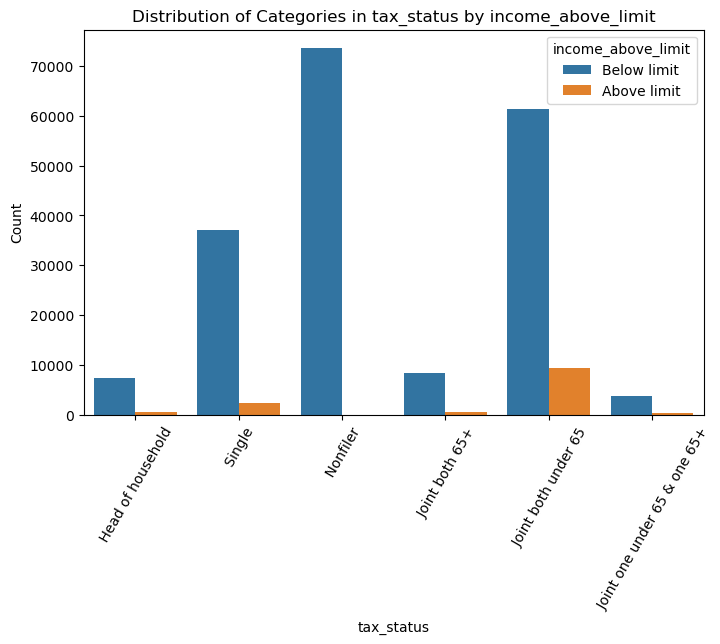

In [33]:
plot_category_counts(feature="tax_status", ticks_rotation=60 , figsize=(8,5))

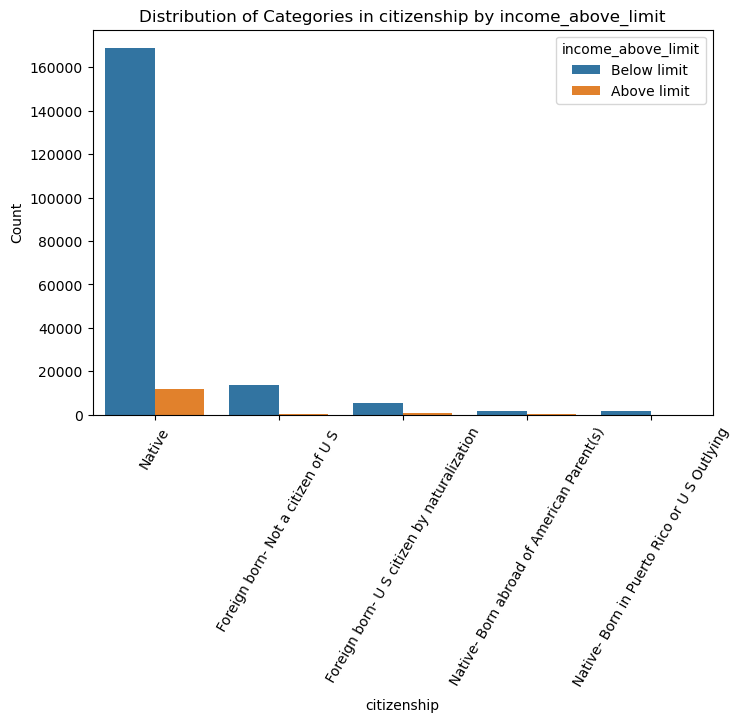

In [34]:
plot_category_counts(feature="citizenship", ticks_rotation=60 , figsize=(8,5))

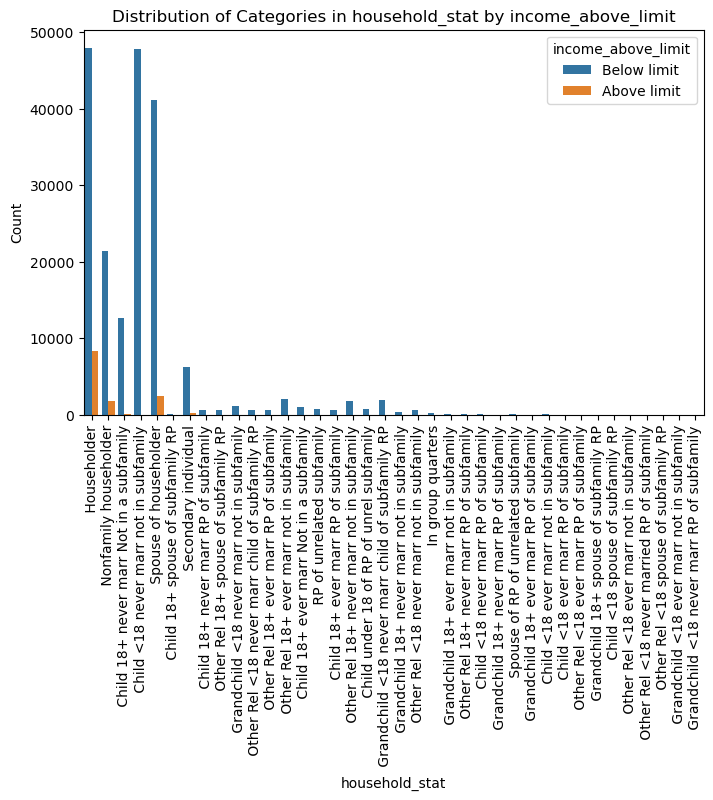

In [35]:
plot_category_counts(feature="household_stat", ticks_rotation=90 , figsize=(8,5))

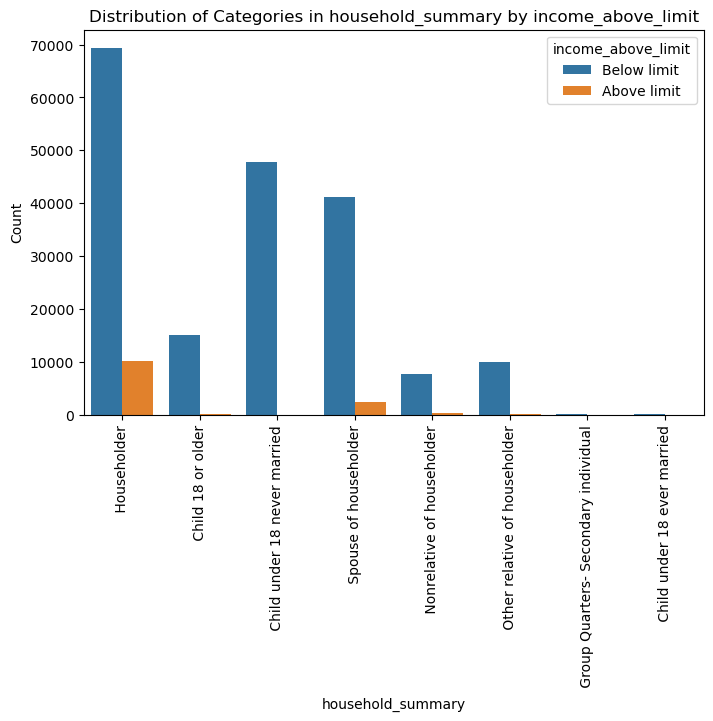

In [36]:
plot_category_counts(feature="household_summary", ticks_rotation=90 , figsize=(8,5))

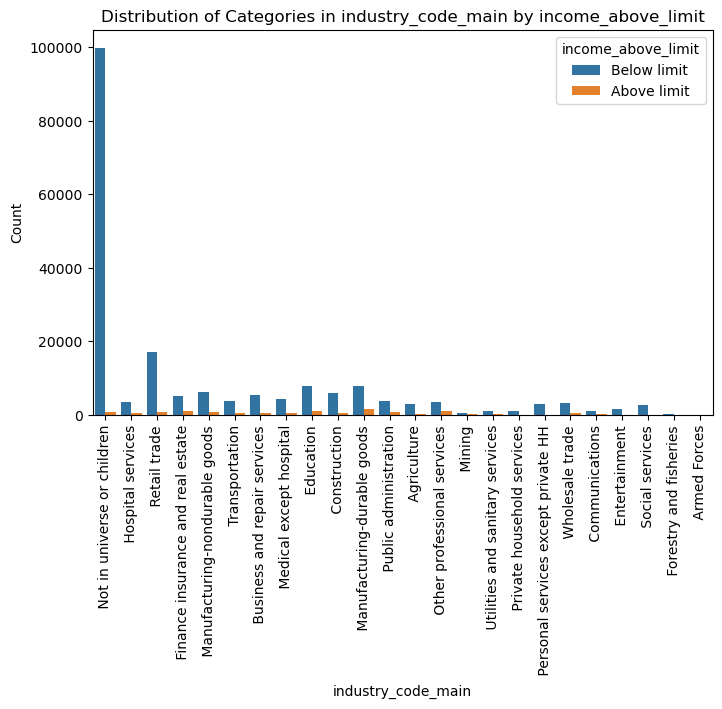

In [37]:
plot_category_counts(feature="industry_code_main", ticks_rotation=90 , figsize=(8,5))

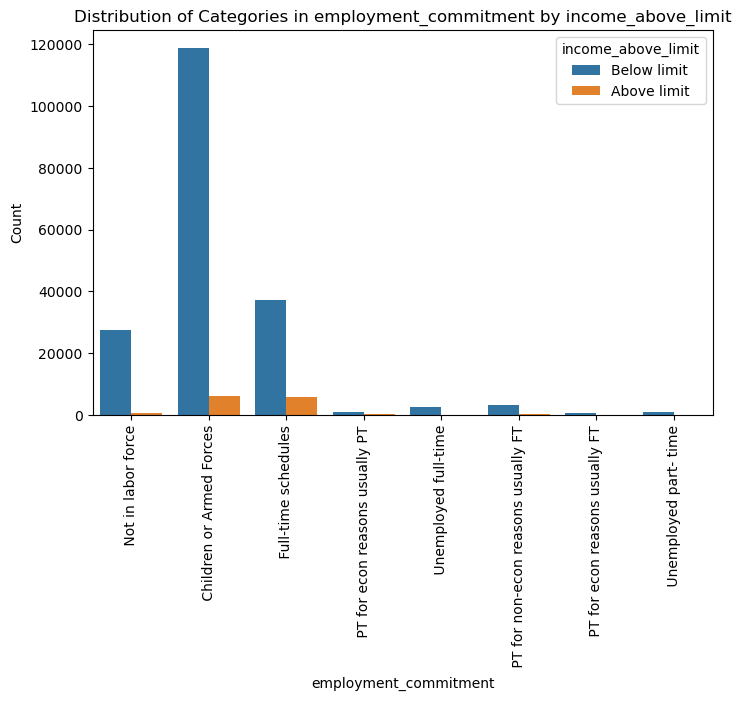

In [38]:
plot_category_counts(feature="employment_commitment", ticks_rotation=90 , figsize=(8,5))

#### Handling Multicolinearty of Training features

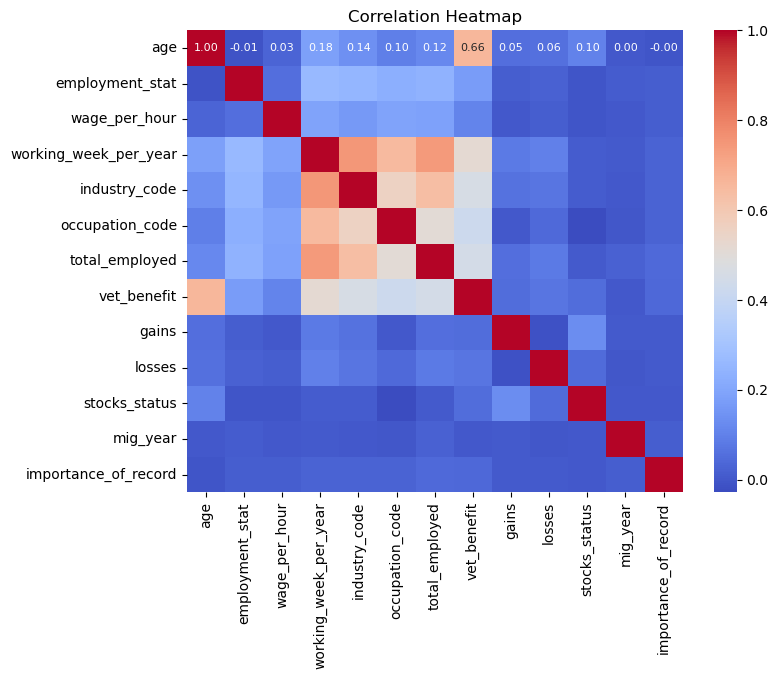

No highly correlated features identified based on correlation coefficients (further analysis might be needed with VIF).


In [39]:
# Calculate correlation matrix
correlation_matrix = df[num_features].corr()
# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'fontsize': 8})  
# Add labels and title
plt.title('Correlation Heatmap')
plt.show()
# Identify highly correlated features (VIF calculation for additional precision)
highly_correlated = [col for col in correlation_matrix.columns if any(abs(val) > 0.8 for val in correlation_matrix[col].drop(col))]
if highly_correlated:
  print("Potentially highly correlated features:", highly_correlated)
  # Consider further analysis like VIF calculation and domain knowledge before dropping features
else:
  print("No highly correlated features identified based on correlation coefficients (further analysis might be needed with VIF).")

In [40]:
def calculate_vif(df):
    """
    Calculate the Variance Inflation Factor (VIF) for each explanatory variable.

    Args:
        X (pd.DataFrame): Design matrix with explanatory variables.

    Returns:
        pd.DataFrame: DataFrame with VIF values and corresponding feature names.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["Features"] = df.columns
    return vif
vif_df = calculate_vif(df[num_features])
print(vif_df)
print("Values above 5 suggest moderate to severe multicollinearity, and above 10 are considered critical.")

    VIF Factor               Features
0     7.156444                    age
1     1.216068        employment_stat
2     1.094580          wage_per_hour
3     7.217233  working_week_per_year
4     4.277864          industry_code
5     3.051784        occupation_code
6     4.051557         total_employed
7    12.435103            vet_benefit
8     1.038306                  gains
9     1.034539                 losses
10    1.041151          stocks_status
11    7.636530               mig_year
12    4.061566   importance_of_record
Values above 5 suggest moderate to severe multicollinearity, and above 10 are considered critical.


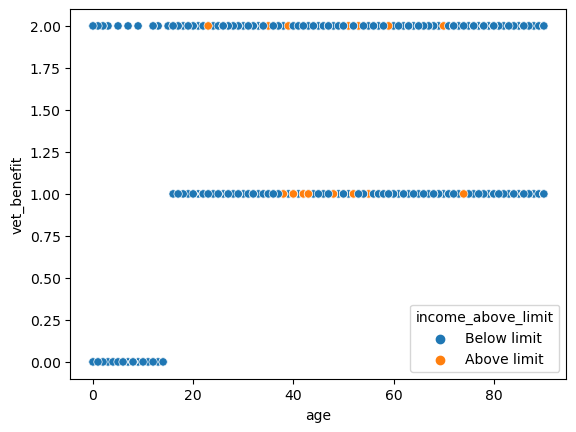

In [41]:
sns.scatterplot(data=df, x="age", y="vet_benefit" , hue = "income_above_limit")
plt.show()

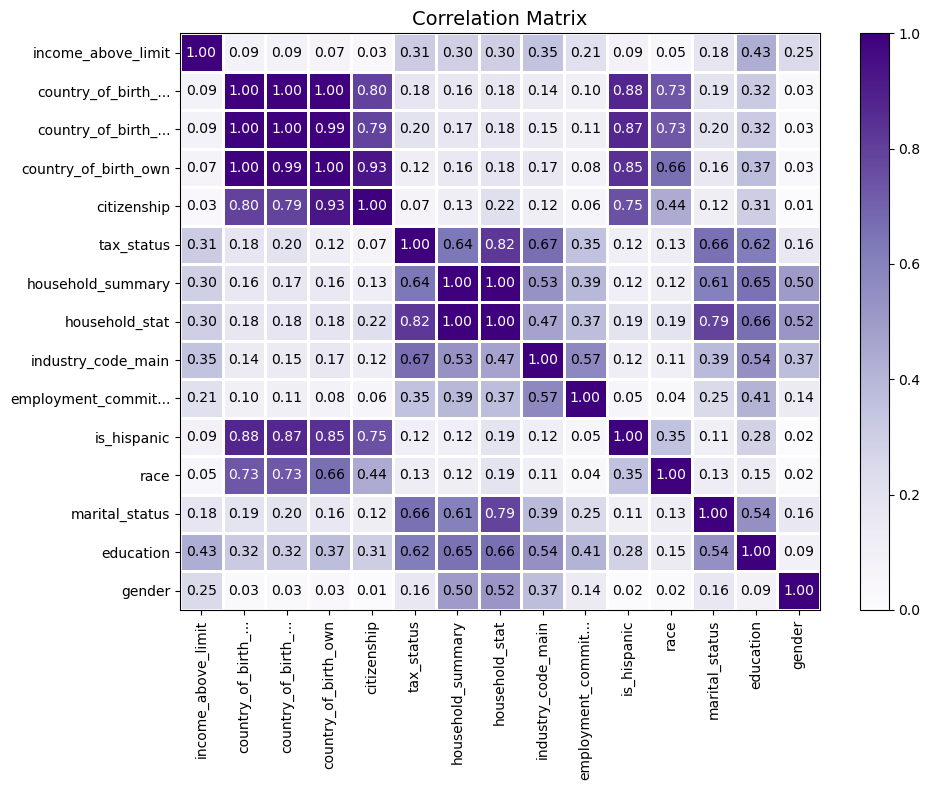

In [42]:
import phik
# cat= [col for col in df.columns if col =="object"]
corr_matrix = df[[feature for feature in dataset.columns if df[feature].dtypes == 'object']].phik_matrix()
plot_correlation_matrix(corr_matrix.values,
                       x_labels= corr_matrix.columns,
                       y_labels= corr_matrix.index,
                       vmin=0,
                       vmax=1,
                       color_map="Purples",
                       title= "Correlation Matrix",
                       fontsize_factor= 1,
                       figsize= (10,8))

In [43]:
categorical_features=[feature for feature in dataset.columns if df[feature].dtypes == 'object']
def chi2_test(feature1, feature2, matrix):
    """
    Performs a chi-squared test on two categorical features and updates the results matrix.

    Args:
        feature1 (str): Name of the first categorical feature.
        feature2 (str): Name of the second categorical feature.
        matrix (np.ndarray): The results matrix to store chi-squared values and p-values.

    Returns:
        np.ndarray: The updated results matrix.
    """

    contingency_table = pd.crosstab(df[feature1], df[feature2])

    try:
        chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)
    except ValueError as e:
        print(f"Error performing chi-squared test: {e}")
        return matrix  # Return unmodified matrix on error

    # Calculate indices inside the function for clarity and avoid potential naming conflicts
    feature1_index = categorical_features.index(feature1)  # Find index of feature1
    feature2_index = categorical_features.index(feature2)  # Find index of feature2

    matrix[feature1_index][feature2_index] = chi2
    matrix[feature1_index][feature2_index + 1] = pval

    return matrix


def analyze_multicollinearity(chi2_results, corr_threshold=0.05):
    """
    Identifies potentially high-collinear feature pairs based on a p-value threshold.

    Args:
        chi2_results (pd.DataFrame): DataFrame containing chi-squared values and p-values.
        corr_threshold (float, optional): Threshold for p-value considered high. Defaults to 0.05.

    Returns:
        list: List of potentially high-collinear feature pairs.
    """

    high_corr_features = []
    for i in range(len(categorical_features)):
        for j in range(i + 1, len(categorical_features)):
            if chi2_results.iloc[i, j + 2] < corr_threshold:  # Correct p-value index
                high_corr_features.append((categorical_features[i], categorical_features[j]))

    return high_corr_features


# Assuming you have a DataFrame `df` with categorical features and a list `categorical_features`
# containing the names of these features

# Analyze pairwise relationships
chi2_results = np.zeros((len(categorical_features), len(categorical_features) * 2))  # Doubled size
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        feature1 = categorical_features[i]
        feature2 = categorical_features[j]
        chi2_results = chi2_test(feature1, feature2, chi2_results.copy())

# Convert matrix to DataFrame with separate columns
column_names = [f"chi2_{col}" for col in categorical_features] + [f"pval_{col}" for col in categorical_features]
chi2_results_df = pd.DataFrame(chi2_results, columns=column_names, index=categorical_features)

# Improved display formatting and handling large DataFrames
print("\nChi-Squared Test Results (Matrix):")
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
display(chi2_results_df)

# Analyze potential multicollinearity
high_corr_features = analyze_multicollinearity(chi2_results_df)

# Print potentially high-collinear features
if high_corr_features:
    print("\nPotentially high-collinear feature pairs:")
    for pair in high_corr_features:
        display(f"- {pair[0]} - {pair[1]}")


Chi-Squared Test Results (Matrix):


,chi2_gender,chi2_education,chi2_marital_status,chi2_race,chi2_is_hispanic,chi2_employment_commitment,chi2_industry_code_main,chi2_household_stat,chi2_household_summary,chi2_tax_status,chi2_citizenship,chi2_country_of_birth_own,chi2_country_of_birth_father,chi2_country_of_birth_mother,chi2_income_above_limit,pval_gender,pval_education,pval_marital_status,pval_race,pval_is_hispanic,pval_employment_commitment,pval_industry_code_main,pval_household_stat,pval_household_summary,pval_tax_status,pval_citizenship,pval_country_of_birth_own,pval_country_of_birth_father,pval_country_of_birth_mother,pval_income_above_limit
gender,0.0,1340.03063,6136.092395,95.838748,37.900778,2359.074305,18041.577571,35773.808602,2.881631e+04,2779.426517,36.440614,191.788675,1.785654e+02,1.506577e+02,5203.351880,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
education,0.0,0.00000,95880.889268,4836.393966,24295.845165,49352.682400,114430.232966,187699.957268,1.683064e+05,125422.375218,21779.588726,39296.844026,2.771456e+04,2.783305e+04,30965.966957,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marital_status,0.0,0.00000,0.000000,5622.231509,3661.145481,22094.689035,38069.045014,275240.094208,1.790050e+05,223796.098813,4769.951161,5635.298633,8.283491e+03,7.753047e+03,7682.796574,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
race,0.0,0.00000,0.000000,0.000000,19564.169365,566.864263,2481.243891,6866.286273,4.369141e+03,6299.202419,25623.882686,117792.907503,1.595855e+05,1.614456e+05,738.567262,1.551284e-158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
is_hispanic,0.0,0.00000,0.000000,0.000000,0.000000,1035.153942,3971.987332,8430.671031,4.516046e+03,3788.185624,135027.415675,441429.186079,5.277314e+05,5.425267e+05,996.882093,8.107037e-209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
employment_commitment,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,82805.327171,33541.399087,2.843834e+04,43137.301312,1058.352518,1709.066808,2.830102e+03,2.558843e+03,5260.151444,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
industry_code_main,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,76781.900081,6.818784e+04,114374.951095,2925.619736,8163.114025,6.684236e+03,6.464244e+03,15713.626094,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
household_stat,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.361422e+06,287271.887654,9012.547647,11951.009428,1.154856e+04,1.095554e+04,11465.149875,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
household_summary,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,184321.465197,5019.224598,5731.771828,6.654397e+03,6.056691e+03,10142.362459,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tax_status,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2043.509813,2992.177934,7.572646e+03,6.680814e+03,10486.275599,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Potentially high-collinear feature pairs:


'- gender - country_of_birth_mother'

'- gender - income_above_limit'

'- education - country_of_birth_mother'

'- education - income_above_limit'

'- marital_status - country_of_birth_mother'

'- marital_status - income_above_limit'

'- race - country_of_birth_mother'

'- race - income_above_limit'

'- is_hispanic - country_of_birth_mother'

'- is_hispanic - income_above_limit'

'- employment_commitment - country_of_birth_mother'

'- employment_commitment - income_above_limit'

'- industry_code_main - country_of_birth_mother'

'- industry_code_main - income_above_limit'

'- household_stat - country_of_birth_mother'

'- household_stat - income_above_limit'

'- household_summary - country_of_birth_mother'

'- household_summary - income_above_limit'

'- tax_status - country_of_birth_mother'

'- tax_status - income_above_limit'

'- citizenship - country_of_birth_mother'

'- citizenship - income_above_limit'

'- country_of_birth_own - country_of_birth_mother'

'- country_of_birth_own - income_above_limit'

'- country_of_birth_father - country_of_birth_mother'

'- country_of_birth_father - income_above_limit'

'- country_of_birth_mother - income_above_limit'

In [44]:
print(categorical_features)
print(num_features)

['gender', 'education', 'marital_status', 'race', 'is_hispanic', 'employment_commitment', 'industry_code_main', 'household_stat', 'household_summary', 'tax_status', 'citizenship', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'income_above_limit']
['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record']


In [45]:
# Removing features with Multicollinearity or similar info
columns = ["country_of_birth_father","country_of_birth_mother","country_of_birth_own","is_hispanic","household_stat","industry_code_main",
           "employment_commitment"]
df.drop(columns=columns , inplace=True)

interval columns not set, guessing: ['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record']


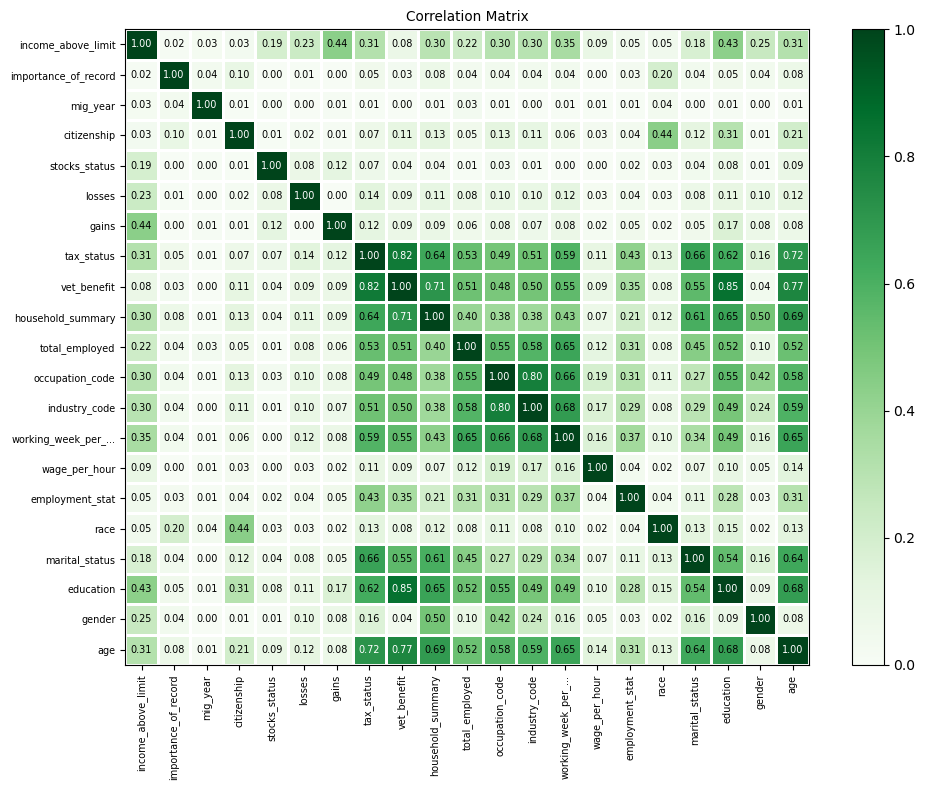

In [46]:
corr_matrix = df.phik_matrix()
plot_correlation_matrix(corr_matrix.values,
                       x_labels= corr_matrix.columns,
                       y_labels= corr_matrix.index,
                       vmin=0,
                       vmax=1,
                       color_map="Greens",
                       title= "Correlation Matrix",
                       fontsize_factor= .7,
                       figsize= (10,8))

## 03_Feature Engineering/Processing
* Removing Outliers
* Normalize/scale/transform features.
* Select relevant features (variables) for modeling.
* Create new features if needed.

#### Handling Outliers

In [47]:
display(df.head(1))
skim(df)

,age,gender,education,marital_status,race,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
ID,,,,,,,,,,,,,,,,,,,,,
ID_TZ0000,79,Female,High school graduate,Widowed,White,0,0,52,0,0,2,Householder,2,Head of household,0,0,292,Native,95,1779.74,Below limit


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 204403 │ │ int32       │ 12    │                                                          │
│ │ Number of columns │ 21     │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean  ┃ sd    ┃ p0  ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ age                       │   0 │      0 │    35 │    22 │   0 │    17 │    34 │    50 │      90 │ ▇▇▇▅▃▂  │  │
│ │ employment_stat           │   0 │      0 │  0.18 │  0.56 │   0 │     0 │     0 │     0 │       2 │ ▇    ▁  │  │
│ │ wage_per_hour             │   0 │      0 │    57 │   280 │   0 │     0 │     0 │     0 │   10000 │    ▇    │  │
│ │ working_week_per_year     │   0 │      0 │    24 │    24 │   0 │     0 │    12 │    52 │      52 │ ▇   ▁▇  │  │
│ │ industry_code             │   0 │      0 │    16 │    18 │   0 │     0 │     2 │    33 │      51 │ ▇  ▂▂▁  │  │
│ │ occupation_code           │   0 │      0 │    12 │    15 │   0 │     0 │     2 │    26 │      46 │ ▇▁▁▂▂▁  │  │
│ │ total_employed            │   0 │      0 │     2 │   2.4 │   0 │     0 │     1 │     4 │       6 │ ▇▂▁▁▁▃  │  │
│ │ vet_benefit               │   0 │      0 │   1.6 │  0.83 │   0 │     2 │     2 │     2 │       2 │ ▂    ▇  │  │
│ │ gains                     │   0 │      0 │   450 │  4800 │   0 │     0 │     0 │     0 │  100000 │    ▇    │  │
│ │ losses                    │   0 │      0 │    38 │   270 │   0 │     0 │     0 │     0 │    4600 │    ▇    │  │
│ │ stocks_status             │   0 │      0 │   200 │  2000 │   0 │     0 │     0 │     0 │  100000 │    ▇    │  │
│ │ mig_year                  │   0 │      0 │    95 │   0.5 │  94 │    94 │    95 │    95 │      95 │ ▇    ▇  │  │
│ │ importance_of_record      │   0 │      0 │  1700 │  1000 │  38 │  1100 │  1600 │  2200 │   19000 │   ▇▁    │  │
│ └───────────────────────────┴─────┴────────┴───────┴───────┴─────┴───────┴───────┴───────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                             │      0 │         0 │                         2 │               408806 │  │
│ │ education                          │      0 │         0 │                       4.1 │               843496 │  │
│ │ marital_status                     │      0 │         0 │                       3.3 │               674956 │  │
│ │ race                               │      0 │       

In [48]:
# g = sns.PairGrid(df, hue="income_above_limit")
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)
# g.add_legend()

In [49]:
def remove_outliers_by_featur(df, column_name, n_std=1.5):
    mean = df[column_name].mean()
    sd = df[column_name].std()
    lower_fence = mean - (n_std * sd)
    upper_fence = mean + (n_std * sd)
    
    # Identify outliers
    outliers = df[(df[column_name] < lower_fence) | (df[column_name] > upper_fence)]
    print(f"Identified outliers: {len(outliers)}")
        # Remove outliers
    df.drop(outliers.index, inplace=True)

def remove_outliers_by_feature_class(df, column_name, class_column, n_std = 1.5):
    for class_value in df[class_column].unique():
        class_df = df[df[class_column] == class_value]
        mean = class_df[column_name].mean()
        sd = class_df[column_name].std()
        lower_fence = mean - (n_std * sd)
        upper_fence = mean + (n_std * sd)
        
        # Identify outliers for this class
        outliers = class_df[(class_df[column_name] < lower_fence) | (class_df[column_name] > upper_fence)]
        print(f"Identified outliers for class '{class_value}': {len(outliers)}")
        
        # Remove outliers for this class
        df.drop(outliers.index, inplace=True)

In [50]:
print(continous_features)
print(discrete_features)

['age', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'gains', 'losses', 'stocks_status', 'importance_of_record']
['employment_stat', 'total_employed', 'vet_benefit', 'mig_year']


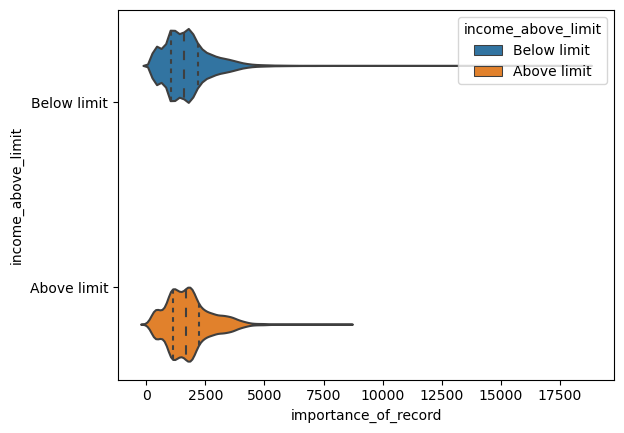

In [51]:
sns.violinplot(data=df, x="importance_of_record",y="income_above_limit",split=False, inner="quart",hue="income_above_limit");

In [52]:
remove_outliers_by_featur(df=df, column_name="importance_of_record", n_std=1.5)

Identified outliers: 18942


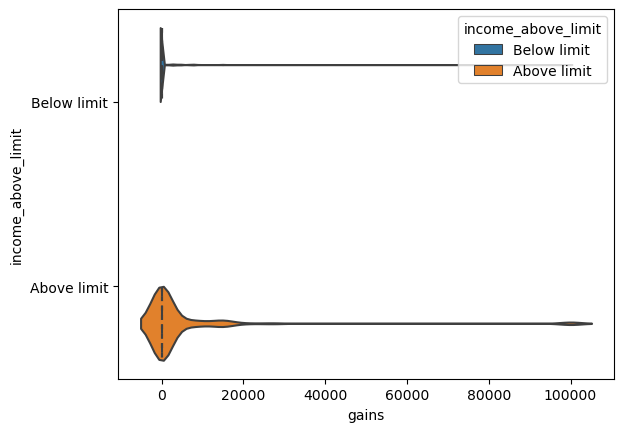

In [53]:
sns.violinplot(data=df, x="gains",y="income_above_limit",split=False, inner="quart",hue="income_above_limit");

In [54]:
remove_outliers_by_featur(df=df, column_name="gains", n_std=1.5)

Identified outliers: 2524


<Axes: xlabel='losses', ylabel='income_above_limit'>

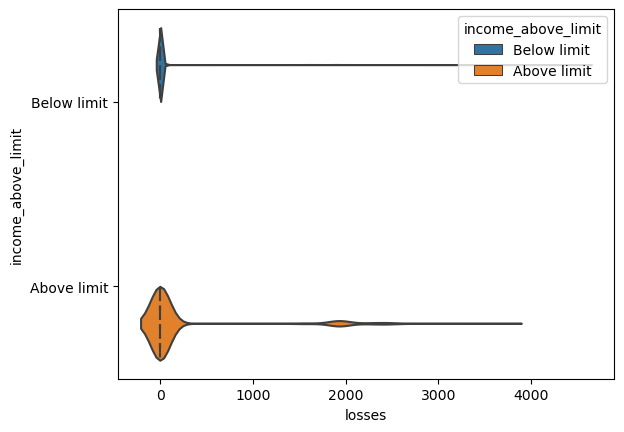

In [55]:
sns.violinplot(data=df, x="losses",y="income_above_limit",split=False, inner="quart",hue="income_above_limit")

In [56]:
remove_outliers_by_featur(df=df, column_name="losses", n_std=1.5)

Identified outliers: 3591


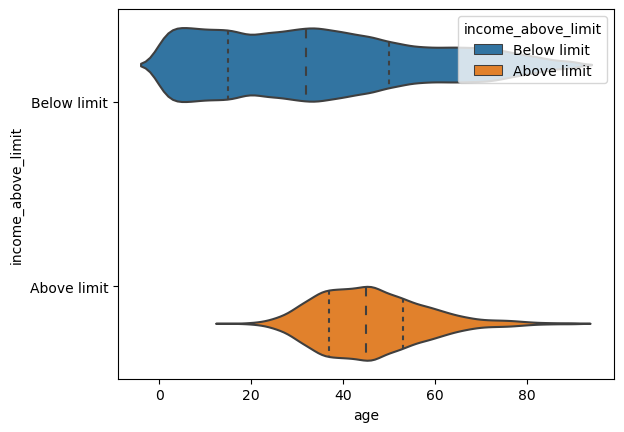

In [57]:
sns.violinplot(data=df, x="age",y="income_above_limit",split=False, inner="quart",hue="income_above_limit");

<Axes: xlabel='working_week_per_year', ylabel='income_above_limit'>

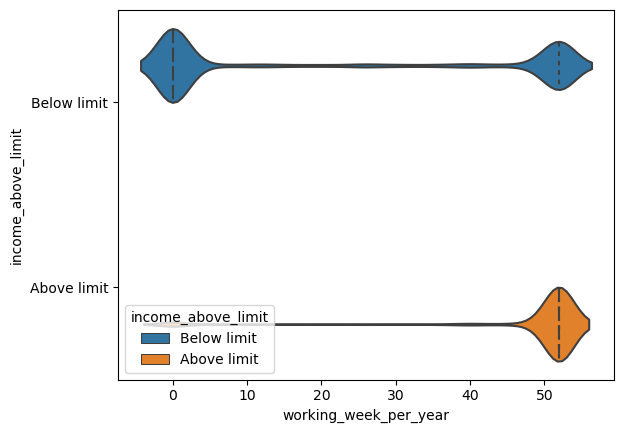

In [58]:
sns.violinplot(data=df, x="working_week_per_year",y="income_above_limit",split=False, inner="quart",hue="income_above_limit")

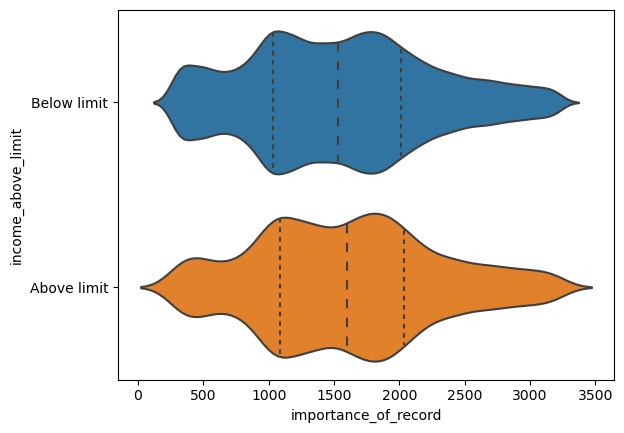

In [59]:
sns.violinplot(data=df, x="importance_of_record", y="income_above_limit", split=False, inner="quart");

In [ ]:
g = sns.PairGrid(df, hue="income_above_limit")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [ ]:
num_features = list(df.select_dtypes(include=['int64','float64']).columns)
num_features
# Set the figure size
plt.figure(figsize=(15, 15))  # Adjust as needed
# Calculate the number of rows and columns for the subplots
num_rows = (len(num_features) + 2) // 3  # Adjust the number of columns as needed
num_cols = 3

# Create subplots with KDE plots
for i, num in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    # sns.kdeplot(df_original[num], fill=True, color='skyblue', linewidth=2)
    sns.kdeplot(df[num], fill=True, color='skyblue', linewidth=2)
    plt.title(f'Distribution of {num}')
    plt.xlabel(num)
    plt.ylabel('Density')

plt.tight_layout()  # Optional: Adjusts the spacing between subplots
plt.show()

In [ ]:
import copy
df_cln = copy.deepcopy(df)
df_cln.shape

#### Normalize/scaling/transformation

In [ ]:
num_total_duplicates = len(df_cln) - len(df_cln.drop_duplicates())
print(f"Total number of duplicate rows: {num_total_duplicates}")

In [64]:
print(df_cln['race'].unique())
race_dict = {'Asian or Pacific Islander': 'Other', 'Amer Indian Aleut or Eskimo': 'Other'}
df_cln['race'] = df['race'].replace(race_dict , regex =True)
df_cln['race'].value_counts()

[' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other']


race
 White    150886
 Black     17356
 Other     11104
Name: count, dtype: int64

In [65]:
# df_cln['citizenship'] = remove_extra_spaces(data=df_cln['citizenship'])
print(df_cln['citizenship'].unique())
# citizenship_dict = {'Foreign born- U S citizen by naturalization': 'Other', 'Foreign born- Not a citizen of U S': "F",
#                    'Native- Born in Puerto Rico or U S Outlying': 'Native','Native- Born abroad of American Parent(s)': 'Native'}
# df['citizenship'] = df['citizenship'].replace(citizenship_dict, regex = True)
df_cln['citizenship'].value_counts()

['Native' ' Foreign born- U S citizen by naturalization'
 ' Foreign born- Not a citizen of U S '
 ' Native- Born abroad of American Parent(s)'
 ' Native- Born in Puerto Rico or U S Outlying']


citizenship
Native                                          157529
 Foreign born- Not a citizen of U S              13074
 Foreign born- U S citizen by naturalization      5578
 Native- Born abroad of American Parent(s)        1645
 Native- Born in Puerto Rico or U S Outlying      1520
Name: count, dtype: int64

In [66]:
print(df_cln['education'].unique())
education_dict = {'Less than 1st grade': "upto 12th grade",
                  '1st 2nd 3rd or 4th grade': 'upto 12th grade',
                  '5th or 6th grade': 'upto 12th grade',
                  '7th and 8th grade': 'upto 12th grade',
                  '9th grade': 'upto 12th grade',
                  '10th grade': 'upto 12th grade',
                  '11th grade': 'upto 12th grade',
                  '12th grade no diploma': 'upto 12th grade',}
df_cln['education'] = df_cln['education'].replace(education_dict, regex = True)
df_cln['education'].value_counts()

[' High school graduate' ' 12th grade no diploma' ' Children'
 ' 7th and 8th grade' ' 11th grade' ' 9th grade'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' Bachelors degree(BA AB BS)'
 ' 10th grade' ' Associates degree-academic program'
 ' 1st 2nd 3rd or 4th grade' ' Some college but no degree'
 ' Less than 1st grade' ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']


education
 High school graduate                      44535
 Children                                  40883
 upto 12th grade                           34995
 Some college but no degree                25061
 Bachelors degree(BA AB BS)                17338
 Masters degree(MA MS MEng MEd MSW MBA)     5512
 Associates degree-occup /vocational        4932
 Associates degree-academic program         3791
 Prof school degree (MD DDS DVM LLB JD)     1324
 Doctorate degree(PhD EdD)                   975
Name: count, dtype: int64

In [67]:
num_total_duplicates = len(df_cln) - len(df_cln.drop_duplicates())
print(f"Total number of duplicate rows: {num_total_duplicates}")

Total number of duplicate rows: 1348


In [68]:
df_cln.drop_duplicates(inplace=True)
num_total_duplicates = len(df_cln) - len(df_cln.drop_duplicates())
print(f"Total number of duplicate rows: {num_total_duplicates}")

Total number of duplicate rows: 0


In [83]:
# column_transformer = ColumnTransformer([
#     (LabelEncoder(), ["income_above_limit", "gender"]),
#     (OrdinalEncoder(), ["education", "race", "tax_status", "citizenship"]),
#     (StandardScaler(), ["stocks_status", "gains", "losses", "importance_of_record"])
# ], remainder='passthrough')

# transformed_data = column_transformer.fit_transform(df_cln)

In [85]:
(df_cln['marital_status'].unique())

array([' Widowed', ' Never married', ' Married-civilian spouse present',
       ' Divorced', ' Married-spouse absent', ' Separated',
       ' Married-A F spouse present'], dtype=object)

In [91]:
le = LabelEncoder()
oe = OrdinalEncoder()
sc = StandardScaler()
df_cln["income_above_limit"] = le.fit_transform(df_cln["income_above_limit"])
df_cln["gender"] = le.fit_transform(df_cln[["gender"]])
df_cln["marital_status"] = le.fit_transform(df_cln[["marital_status"]])
df_cln["household_summary"] = le.fit_transform(df_cln[["household_summary"]])
df_cln["education"] = le.fit_transform(df_cln[["education"]])
df_cln["race"] = le.fit_transform(df_cln[["race"]])
df_cln["tax_status"] = le.fit_transform(df_cln[["tax_status"]])
df_cln["citizenship"] = le.fit_transform(df_cln[["citizenship"]])
df_cln["stocks_status"] = sc.fit_transform(df_cln[["stocks_status"]])
df_cln["importance_of_record"] = sc.fit_transform(df_cln[["importance_of_record"]])
df_cln.head(1)

,age,gender,education,marital_status,race,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
ID,,,,,,,,,,,,,,,,,,,,,
ID_TZ0000,79,0,5,6,2,0,0,52,0,0,2,4,2,0,0,0,0.082339,4,95,0.315349,1


In [92]:
(df_cln['marital_status'].unique())

array([6, 4, 2, 0, 3, 5, 1], dtype=int64)

#### Selecting relevant features (variables) for modeling.

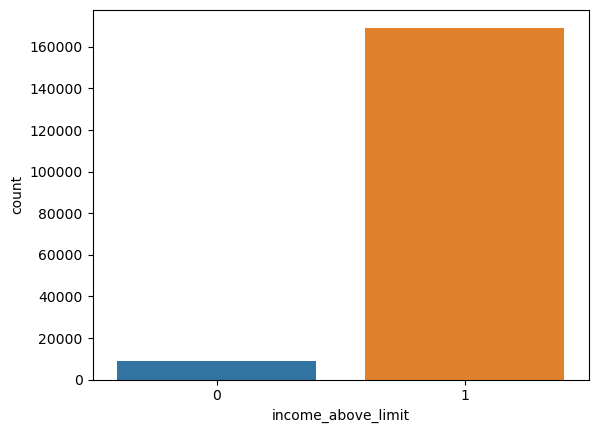

In [93]:
sns.countplot(df_cln, x="income_above_limit")
plt.show()

In [94]:
y = df_cln["income_above_limit"]
X = df_cln.drop(columns=["income_above_limit"] , axis=1).copy()
print(X.shape, len(y))

(177998, 20) 177998


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Imbalance Class Handling - Using Upsampling Technique

In [96]:
from imblearn.over_sampling import SMOTE , ADASYN , BorderlineSMOTE
from imblearn.combine import SMOTEENN

###### SMOTE: Synthetic Minority Oversampling Technique:
* SMOTE is an oversampling technique specifically designed for imbalanced datasets.
* 
It generates synthetic samples for the minority class, overcoming the overfitting problem posed by random oversampling
* How it works:
    * Set the total number of oversampling observations (N). Typically, a 1:1 class distribution is chosen, but this can be adjusted based on need.
    * 
Randomly select a positive class instance
    * 
Obtain the K nearest neighbors (usually 5) for that instanc
    * .
Interpolate new synthetic instances based on the feature space and the differences in distance between the feature vector and its neighbors..ghbors.

In [97]:
#Apply SMOTE to balance the target classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(X_train_balanced.shape, len(y_train_balanced))

(236966, 20) 236966


###### ADASYN (Adaptive Synthetic Sampling):
* ADASYN generates synthetic samples for the minority class by focusing on samples that are difficult to classify
* 
It adapts the density distribution of the minority clas.y

In [102]:
# #Assuming you have X_train and y_train
# adasyn = ADASYN(random_state=42)
# X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
# print(X_train_adasyn.shape, len(y_train_adasyn))

##### Borderline-SMOTE:
* 
Borderline-SMOTE focuses on the borderline instances (near the decision boundary) of the minority class
* 
It generates synthetic samples for these borderline instances.

In [104]:
# # Assuming you have X_train and y_train
# borderline_smote = BorderlineSMOTE(random_state=42)
# X_train_border, y_train_border = borderline_smote.fit_resample(X_train, y_train)
# print(X_train_border.shape, len(y_train_border))

##### Combination Methods:
Combination methods combine multiple resampling techniques.

In [105]:
# # Assuming you have X_train and y_train
# smoteenn = SMOTEENN(random_state=42)
# X_train_combined, y_train_combined = smoteenn.fit_resample(X_train, y_train)
# print(X_train_combined.shape, len(y_train_combined))

#### Final Feature Selection using classifier ensemblers 

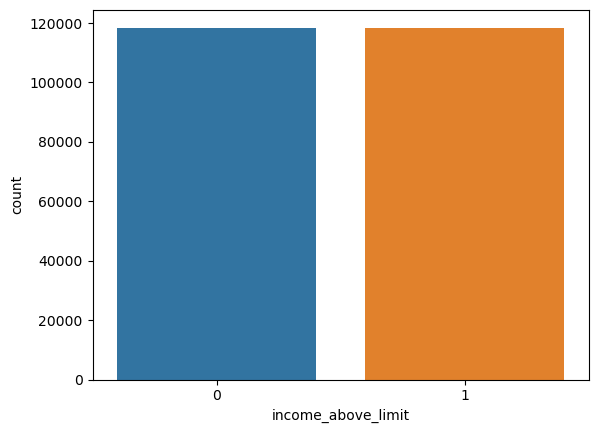

In [106]:
sns.countplot(x=y_train_balanced)
plt.show()

In [124]:
def feature_importance_plot(df, model=None, top_n=10 , figsize=(10,5)):
  """
  Creates a bar plot visualizing feature importances from a model or DataFrame.

  Args:
      df (pd.DataFrame): DataFrame containing features and their importances (optional).
      model (object, optional): Trained model object with feature_importances_ attribute (optional).
      top_n (int, optional): Number of top features to display (default: 10).

  Returns:
      None
  """

  # Check if feature importances are provided in either df or model
  if model is not None:
    feature_importance_df = pd.DataFrame({'Feature': df.columns, 'Importance': model.feature_importances_})
  elif 'Importance' in df.columns:
    feature_importance_df = df.copy()
  else:
    raise ValueError("Feature importances not found in either provided DataFrame or model.")

  # Sort and select top features
  feature_importance_df.sort_values(by="Importance", ascending=False, inplace=True)
  top_features = feature_importance_df.head(top_n)

  # Create the bar plot with seaborn
  plt.figure(figsize=figsize)
  ax = sns.barplot(x="Importance", y="Feature", data=top_features)
  ax.set_title(f"Top {top_n} Feature Importances")
  ax.set_xlabel("Importance")
  ax.set_ylabel("Feature")    
  plt.show()

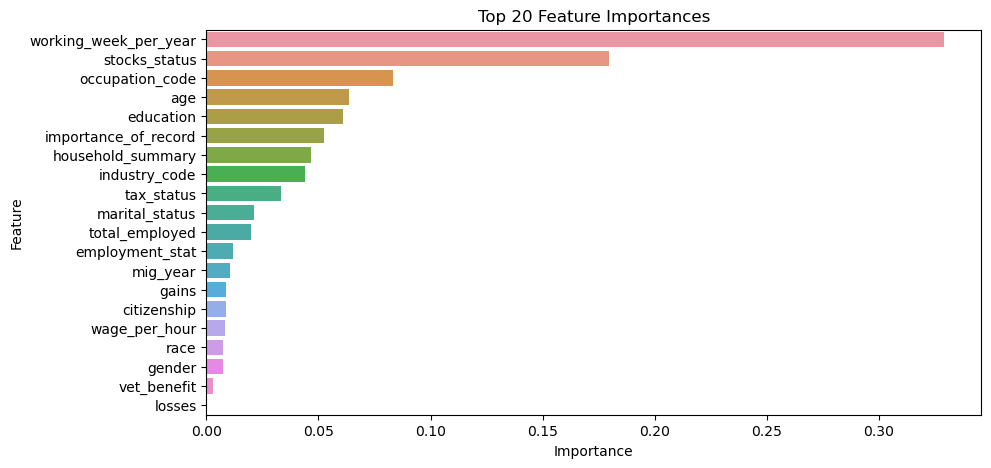

In [125]:
# Train a decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_balanced, y_train_balanced)
# # dtc.fit(X_train_adasyn, y_train_adasyn)
# # dtc.fit(X_train_border, y_train_border)
# # dtc.fit(X_train_combined, y_train_combined)
# # Get feature importance
# dtc_feature_imp = dtc.feature_importances_
# print("Feature Importance:")
# for feature, importance in zip(X.columns, dtc_feature_imp):
#     print(f"{feature}: {importance:.4f}")
feature_importance_plot(df=X_train_balanced , model=dtc ,top_n=20)

In [119]:
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(x=X.columns, y=dtc_feature_imp, orient='v')
# # Add value labels on top of each bar
# for i, v in enumerate(dtc_feature_imp):
#     ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.title("Feature Importance")
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

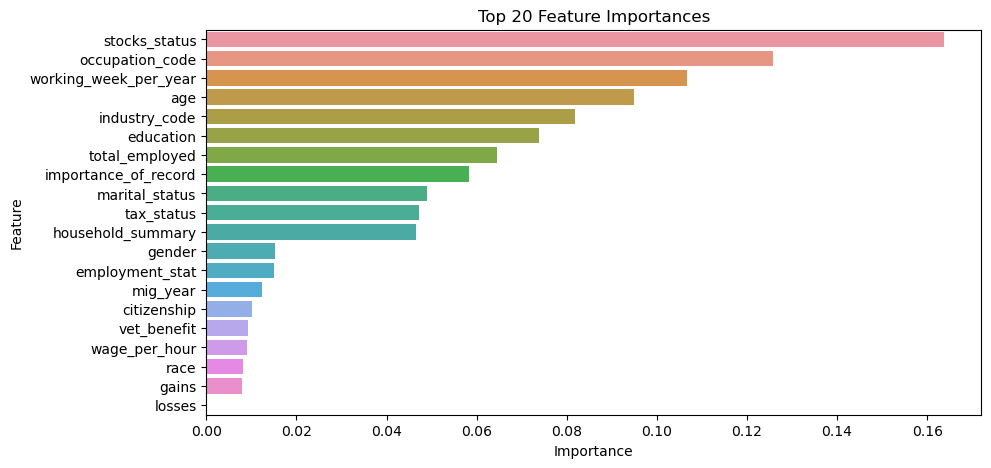

In [126]:
# Getting important features with RF
rfc = RandomForestClassifier()
# rfc.fit(X_train_adasyn, y_train_adasyn)
rfc.fit(X_train_balanced, y_train_balanced)
feature_importance_plot(df=X_train_balanced , model=rfc ,top_n=20)

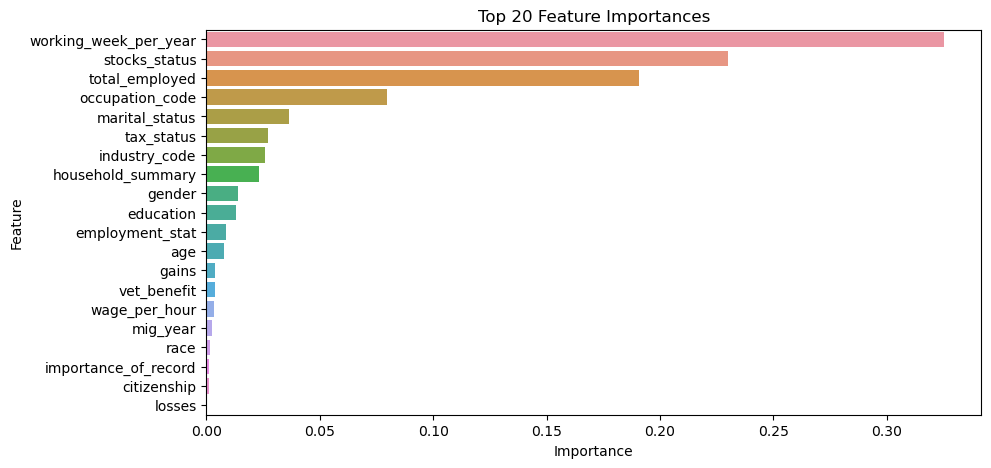

In [127]:
# Train a XGBFC classifier
xgb = XGBRFClassifier()
xgb.fit(X_train_balanced, y_train_balanced)
# Get feature importance
feature_importance_plot(df=X_train_balanced , model=xgb ,top_n=20)

#### Final Feature Selection using selectkbest

In [128]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_classif, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_classif, k=x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)

    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_classif, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_classif, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)

    return X_train_fs, X_test_fs, fs_info

In [129]:
X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train=X_train_balanced, y_train=y_train_balanced, X_test=X_test)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train=X_train_balanced, y_train=y_train_balanced, X_test=X_test)

Feature age: 21788.539372
Feature gender: 11724.505214
Feature education: 9182.538273
Feature marital_status: 40943.022506
Feature race: 1210.927737
Feature employment_stat: 282.935306
Feature wage_per_hour: 407.214279
Feature working_week_per_year: 113166.864293
Feature industry_code: 44505.194445
Feature occupation_code: 134.064771
Feature total_employed: 54025.851429
Feature household_summary: 7354.987599
Feature vet_benefit: 31627.849709
Feature tax_status: 37752.352490
Feature gains: 2212.264801
Feature losses: 14.418204
Feature stocks_status: 4249.892038
Feature citizenship: 462.013009
Feature mig_year: 7300.366336
Feature importance_of_record: 334.443424


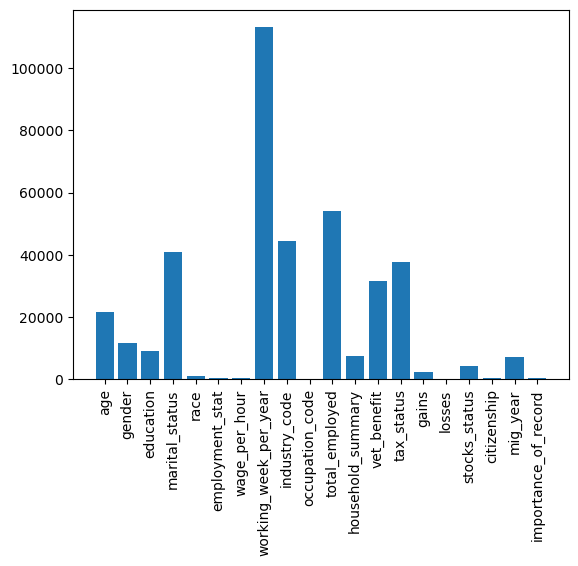

Feature age: 0.182483
Feature gender: 0.033773
Feature education: 0.207436
Feature marital_status: 0.155756
Feature race: 0.031409
Feature employment_stat: 0.022353
Feature wage_per_hour: 0.016191
Feature working_week_per_year: 0.205336
Feature industry_code: 0.175933
Feature occupation_code: 0.254204
Feature total_employed: 0.158823
Feature household_summary: 0.146603
Feature vet_benefit: 0.116365
Feature tax_status: 0.148836
Feature gains: 0.017352
Feature losses: 0.000630
Feature stocks_status: 0.250978
Feature citizenship: 0.034877
Feature mig_year: 0.028469
Feature importance_of_record: 0.088072


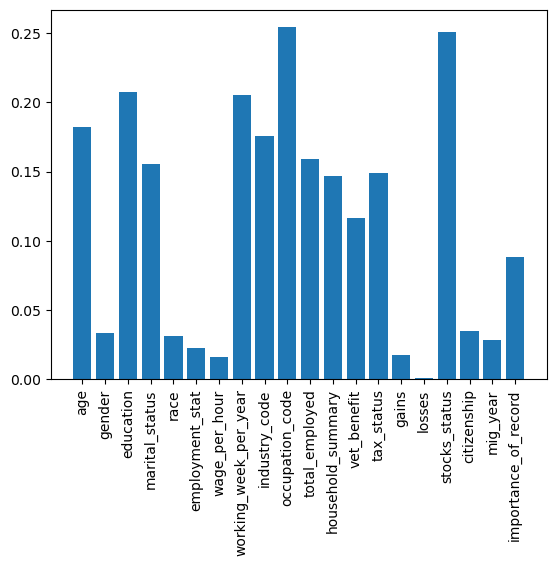

In [130]:
def fs_score_plot(fs_func):
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()

fs_score_plot(fs_corr)
fs_score_plot(fs_info)

The **Phi_K** library in Python serves as a practical correlation constant that works consistently across **categorical, ordinal, and interval variables**. It provides an alternative to Pearson's correlation coefficient and offers several advantages:

1. **Consistency Across Variable Types**:
   - Phi_K works consistently between different types of variables (categorical, ordinal, and interval).
   - Unlike some other coefficients, it doesn't break down when dealing with mixed typs.

2. **Captures Non-Linear Dependency**:
   - Phi_K can capture non-linear dependencies between variables.
   - This is useful when studying the correlation matrix of variables with diverse datatypes.

3. **Reverts to Pearson Correlation**:
   - In cases where the input distribution is bivariate normal, Phi_K reverts to the Pearson correlation coefficient.
   - This flexibility makes it suitable for various scenarios.

4. **Statistical Significance Evaluation**:
   - Phi_K emphasizes proper evaluation of statistical significancns.
   - It helps interpret variable relationships, especially in low-statistics samples.

In [ ]:
def features_dist(column_name):
    return pd.concat([df_original[column_name].value_counts() / df_original.shape[0]*100,
        df_cln[column_name].value_counts() / df_cln.shape[0] * 100], axis=1,
        keys=[column_name + '_orginal', column_name + '_clean'])
features_dist("employment_stat")

## 04_Model Selection, Training and Evaluation

#### Creating Model

##### 1-Randomforest

In [134]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [135]:
# Evaluate metrics
def get_accuracy_score(y_test , y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
get_accuracy_score(y_test, y_pred)

Accuracy: 0.85
Precision: 0.95
Recall: 0.85
F1-score: 0.89


##### 2-Logistic Regressor

In [137]:
lr_classifier = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
# Train the classifier
lr_classifier.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred = lr_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Accuracy: 0.80
Precision: 0.95
Recall: 0.80
F1-score: 0.85


##### 3-Logistic RegressorCV

In [139]:
lrcv_classifier = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', scoring='accuracy', solver='lbfgs', max_iter=100)
# Train the classifier
lrcv_classifier.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred = lrcv_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Accuracy: 0.80
Precision: 0.95
Recall: 0.80
F1-score: 0.85


##### 4-SGDClassifier

In [140]:
sgd_classifier = SGDClassifier(loss='hinge', alpha=0.01, max_iter=500, random_state=42)
# Train the classifier
sgd_classifier.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Accuracy: 0.75
Precision: 0.95
Recall: 0.75
F1-score: 0.82


##### 5-BaggingClassifier

In [141]:
bagging_classifier = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0,
                                       max_features=1.0, bootstrap=True, random_state=42)
# Train the classifier
bagging_classifier.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1-score: 0.93


##### 6-ExtraTreesClassifier

In [142]:
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2,
                                              min_samples_leaf=1, max_features='sqrt', random_state=42)
# Train the classifier
extra_trees_classifier.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred = extra_trees_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Accuracy: 0.93
Precision: 0.95
Recall: 0.93
F1-score: 0.94


##### 7-KNeighborsClassifier

In [144]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
# Train the classifier
knn_classifier.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Accuracy: 0.87
Precision: 0.95
Recall: 0.87
F1-score: 0.90


##### 8-SVC

In [ ]:
# svc_classifier = SVC(kernel='linear', C=1.0, random_state=42)
# # Train the classifier
# svc_classifier.fit(X_train_balanced, y_train_balanced)
# # Make predictions on the test set
# y_pred = svc_classifier.predict(X_test)

In [ ]:
# get_accuracy_score(y_test, y_pred)

##### 9-NuSVC

In [ ]:
# nu_svc_classifier = NuSVC(nu=0.5, kernel='rbf', gamma='scale', random_state=42)
# # Train the classifier
# nu_svc_classifier.fit(X_train_balanced, y_train_balanced)
# # Make predictions on the test set
# y_pred = nu_svc_classifier.predict(X_test)

In [ ]:
# get_accuracy_score(y_test, y_pred)

##### 10-LinearSVC

In [ ]:
# linear_svc_classifier = LinearSVC(max_iter=500, random_state=42)
# # Train the classifier
# linear_svc_classifier.fit(X_train_balanced, y_train_balanced)
# # Make predictions on the test set
# y_pred = linear_svc_classifier.predict(X_test)

In [ ]:
# get_accuracy_score(y_test, y_pred)

##### 11-XGBClassifier

In [145]:
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
# Train the classifier
xgb_classifier.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Accuracy: 0.86
Precision: 0.95
Recall: 0.86
F1-score: 0.90


##### 12-XGBRFClassifier

In [146]:
xgbrf_classifier = XGBRFClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
# Train the classifier
xgbrf_classifier.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred = xgbrf_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Accuracy: 0.82
Precision: 0.95
Recall: 0.82
F1-score: 0.87


##### Traning altogether

In [147]:
# Create classifiers
classifiers = [
    # SVC(gamma='auto'),
    # NuSVC(gamma='auto'),
    # LinearSVC(),
    SGDClassifier(max_iter=50, tol=1e-3),
    KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'),
    LogisticRegressionCV(cv=3),
    BaggingClassifier(),
    ExtraTreesClassifier(n_estimators=100),
    RandomForestClassifier(n_estimators=100),
    XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42),
    XGBRFClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
]

In [152]:
def train_classifiers(classifiers, X_train, y_train):
    trained_classifiers = {}
    for clf in classifiers:
        clf.fit(X_train, y_train)
        trained_classifiers[clf.__class__.__name__] = clf
    return trained_classifiers

def get_scores(trained_classifiers, X_test, y_test):
    scores = {}
    for clf_name, clf in trained_classifiers.items():
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        scores[clf_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        }
        # Calculate feature importance (if available)
        if hasattr(clf, 'feature_importances_'):
            importances = clf.feature_importances_
            indices = np.argsort(importances)
            num_features = 20  # Customize the number of features to display
            plt.figure(figsize=(10, 6))
            plt.title(f'Feature Importances for {clf_name}')
            plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
            plt.yticks(range(num_features), X_test.columns)
            plt.xlabel('Importance Score')
            plt.show()

    return scores

In [149]:
trained_classifiers = train_classifiers(classifiers=classifiers , X_train = X_train_balanced , y_train = y_train_balanced)

In [ ]:
def plot_feature_importance(model, train_features, num_features=10):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
    plt.yticks(range(num_features), train_features.columns)
    plt.xlabel('Importance Score')
    plt.show()

#### Evaluating Model

In [159]:
# Visualize results
df_scores = pd.DataFrame(scores)
df_scores

,SGDClassifier,KNeighborsClassifier,LogisticRegression,LogisticRegressionCV,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier,XGBClassifier,XGBRFClassifier
Accuracy,0.731067,0.871152,0.779466,0.795169,0.915983,0.934522,0.932781,0.863820,0.818455
Precision,0.991104,0.982435,0.990349,0.990766,0.977453,0.974538,0.976271,0.987206,0.988310
Recall,0.723786,0.880289,0.775727,0.792057,0.933205,0.956149,0.952488,0.868094,0.818840
F1-score,0.836610,0.928561,0.869997,0.880337,0.954817,0.965256,0.964233,0.923826,0.895628


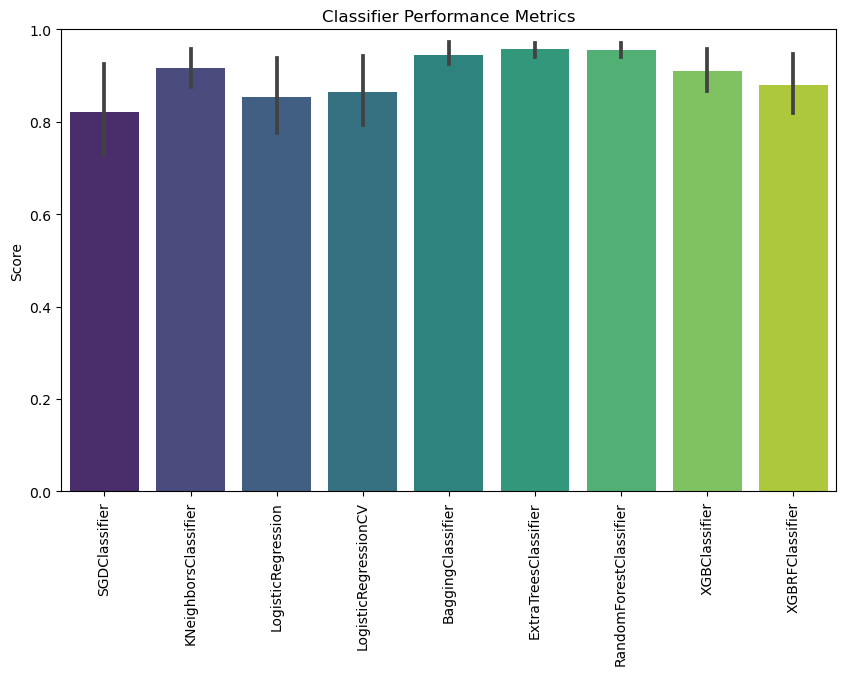

In [160]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_scores, palette='viridis')
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.show()

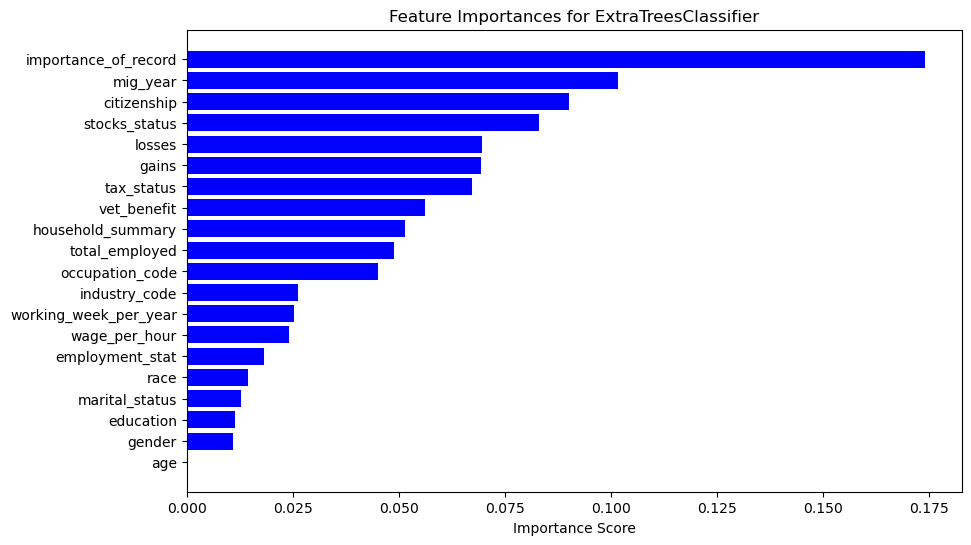

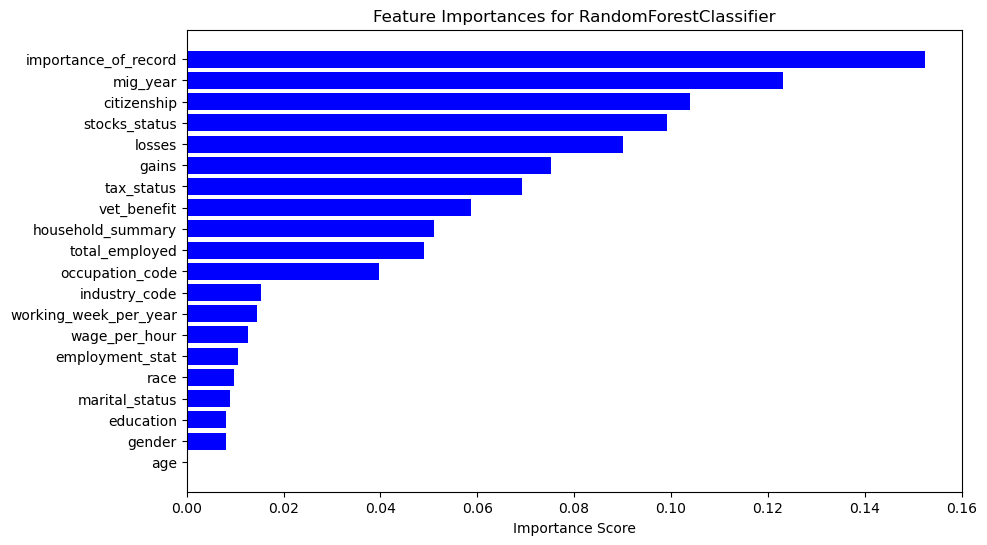

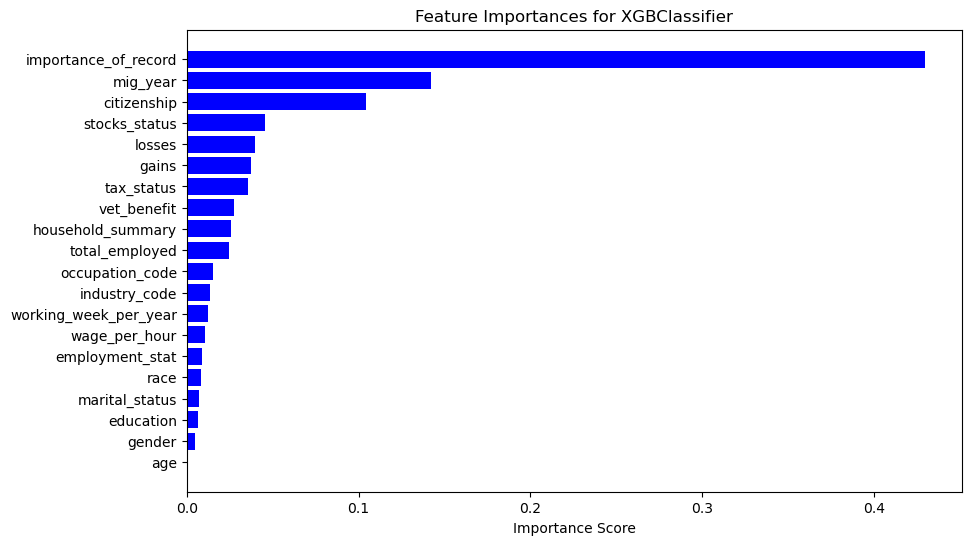

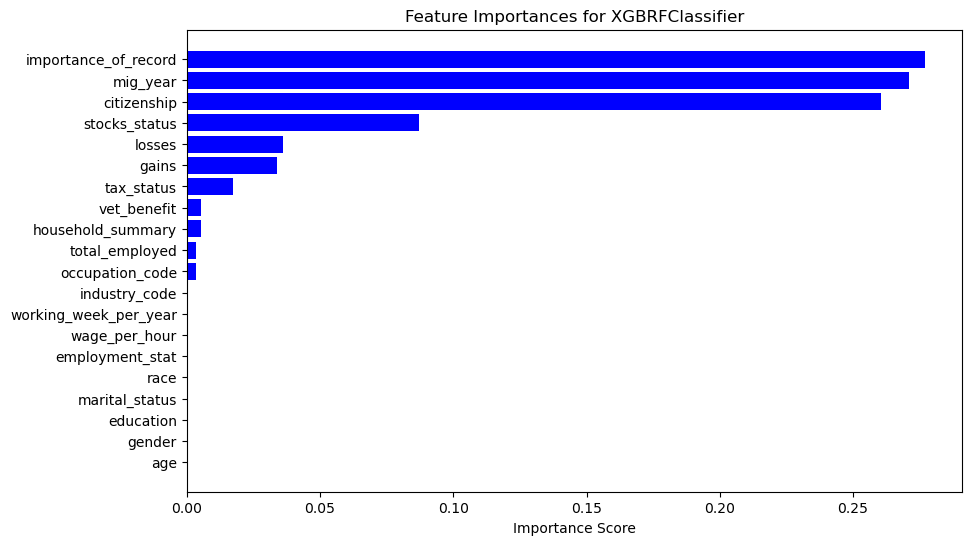

In [161]:
scores = get_scores(trained_classifiers, X_test, y_test)

### Tuning the Model

In [ ]:
# Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [50, 80, 100, 200, 250, 300],  # Number of trees in the forest
#     # "criterion": ["gini", "entropy"],
#     "max_depth": [5, 10],
#     'max_features': ['sqrt', 'log2'],  # Maximum features considered for each split or "max_features": [3, 5]
#     'min_samples_split': [2, 4, 6,],  # Minimum samples required to split an internal node
#     'bootstrap': [True, False]  # Whether bootstrap samples are used
# }
# # Create the Random Forest Regressor
# rf_model = RandomForestRegressor(random_state=42)

## 05_Evaluating Tuned Models

## 06_Communicating the Result/Report